## Import required modules

In [11]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

## Set up constant variables (Change images directory here)

In [2]:
MODEL_NAME = "LearnMOF_MODEL_BATCH5_tested_acc95"

MODEL_DIR = Path(".")
RESULTS_DIR = Path("results")
MODEL_PATH = MODEL_DIR / MODEL_NAME

IMAGES_DIR = Path("images")

SEED = 1337
IMG_SIZE = 512

BATCH_SIZE = 1  # Number of images per batch to load into memory, since we are testing only a couple of images, 1 is enough
NUM_WORKERS = 1 # Number of CPU cores to load images

In [3]:
# Define the class names and the target directories
class_names = {
    0: 'challenging-crystal',
    1: 'crystal',
    2: 'non-crystal'
}

## Set up device to run the model

In [4]:
# Setup device-agnostic code
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model = torch.load(MODEL_NAME,map_location=device)
model = model.to(device)

## Preprocessing required to comply with model config

In [5]:
test_transforms_list = [
    transforms.Resize(size=(IMG_SIZE,IMG_SIZE)),
    transforms.ToTensor(), # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
] 

# Normalize the images
test_transforms_list.append(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))
test_transform = transforms.Compose(test_transforms_list)


## Run the model on the images and plot the results

Image images\1_41.jpg: Predicted class: crystal with probabilities: [[0.0424755  0.948475   0.00904951]].
Image images\1_42.jpg: Predicted class: crystal with probabilities: [[0.03493425 0.9555367  0.00952904]].
Image images\1_43.jpg: Predicted class: crystal with probabilities: [[0.2634222  0.7272455  0.00933227]].
Image images\1_44.jpg: Predicted class: challenging-crystal with probabilities: [[0.9237868  0.07041878 0.00579443]].
Image images\1_45.jpg: Predicted class: challenging-crystal with probabilities: [[0.9712517  0.01081506 0.01793322]].
Image images\1_5705.jpg: Predicted class: non-crystal with probabilities: [[0.06187801 0.01633859 0.92178345]].
Image images\1_5731.jpg: Predicted class: non-crystal with probabilities: [[0.04576039 0.00295438 0.9512853 ]].
Image images\1_5832.jpg: Predicted class: challenging-crystal with probabilities: [[0.7122105  0.05206858 0.23572093]].
Image images\1_5903.jpg: Predicted class: challenging-crystal with probabilities: [[0.66681707 0.00911

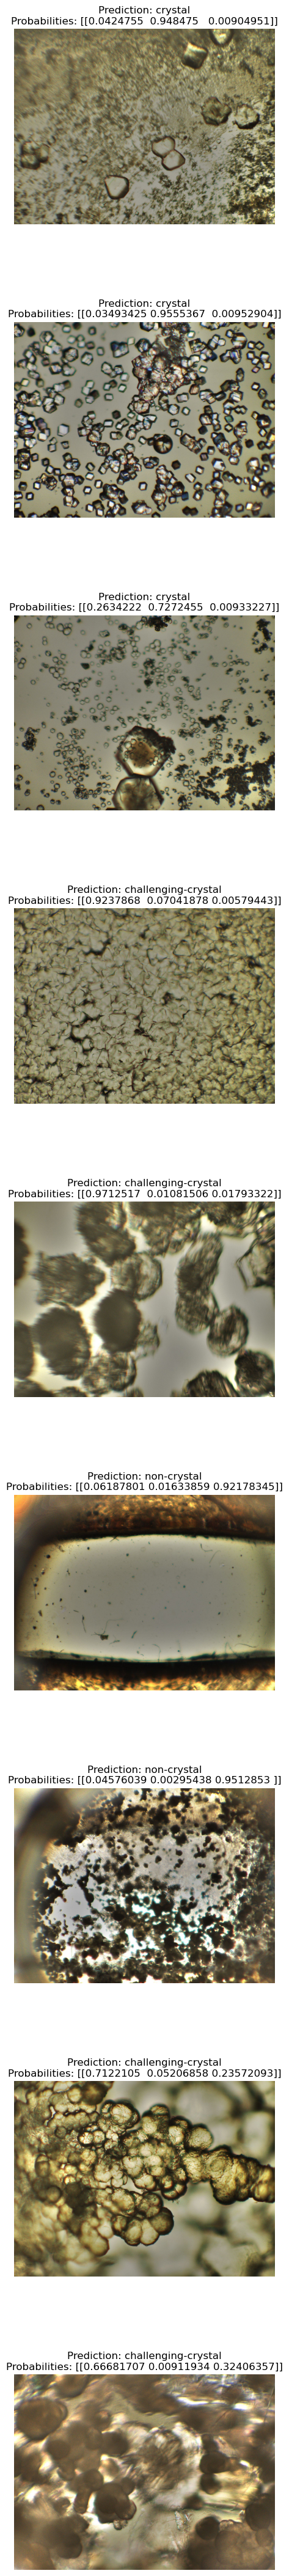

In [10]:
model.eval()
with torch.no_grad():
    # 1. Get all image paths (* means "any combination")
    image_path_list = list(IMAGES_DIR.glob("*.jpg"))

    images = []
    probabilities = []
    for path in image_path_list:
        img = Image.open(path)
        
        images.append(img)
        tensor_img = test_transform(img).unsqueeze(0)
        tensor_img = tensor_img.to(device)
        prediction = torch.nn.functional.softmax(model(tensor_img),dim=1).cpu().numpy()

        probabilities.append(prediction)

        print(f"Image {path}: Predicted class: {class_names[prediction.argmax()]} with probabilities: {prediction}.")
    
    # Define the figure and axes
    fig, axes = plt.subplots(nrows=len(images), ncols=1, figsize=(8, 6*len(images)))

    # Iterate over the images and labels and plot each one
    for i, (image, prediction) in enumerate(zip(images, probabilities)):
        # Plot the image
        axes[i].imshow(image)  # Transpose the image from (C, H, W) to (H, W, C)
        
        # Add the label as a title
        axes[i].set_title(f"Prediction: {class_names[prediction.argmax()]}\nProbabilities: {prediction}")
        
        # Remove the axes
        axes[i].axis('off')

    # Adjust the spacing between the subplots
    plt.subplots_adjust(hspace=0.5)

    # Show the plot
    plt.show()